## Comparative Analysis of Machine Learning Models for Binary Classification"

## Libraries Importations 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

## Training and Benchmarking Classification Models

In [ ]:
# Generate synthetic dataset
np.random.seed(42)
n_samples = 1000
n_features = 10
X = np.random.rand(n_samples, n_features)
y = np.random.choice([0, 1], size=n_samples)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)fr\
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred)
    }

# Display results
df_results = pd.DataFrame(results).T
print(df_results)

## Matrix Visualization for Random Forest

In [ ]:
# Confusion Matrix for Random Forest
rf_model = models["Random Forest"]
y_pred_rf = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Explaining Model Predictions with SHAP (XGBoost)

In [ ]:
# Feature importance using SHAP for XGBoost
xgb_model = models["XGBoost"]
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, feature_names=[f"Feature {i+1}" for i in range(n_features)])
plt.show()

## Feature Importance Comparison Across Models

[16:49:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



                     Accuracy  Precision  Recall  F1 Score  ROC AUC
Logistic Regression     0.530   0.521429    0.73  0.608333    0.530
Random Forest           0.495   0.495652    0.57  0.530233    0.495
XGBoost                 0.505   0.504762    0.53  0.517073    0.505


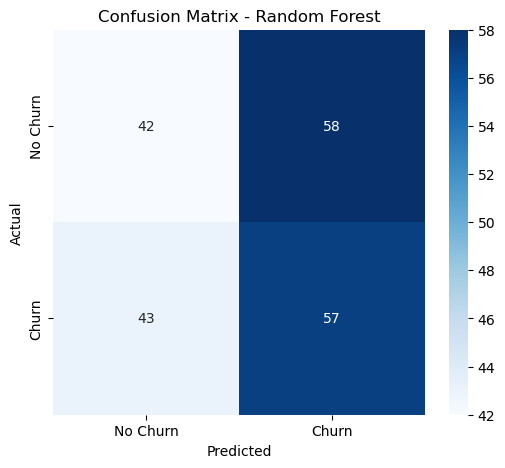

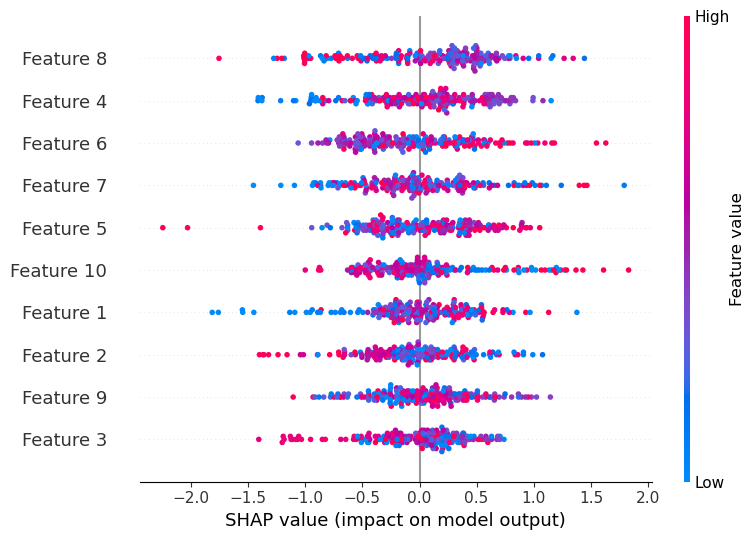

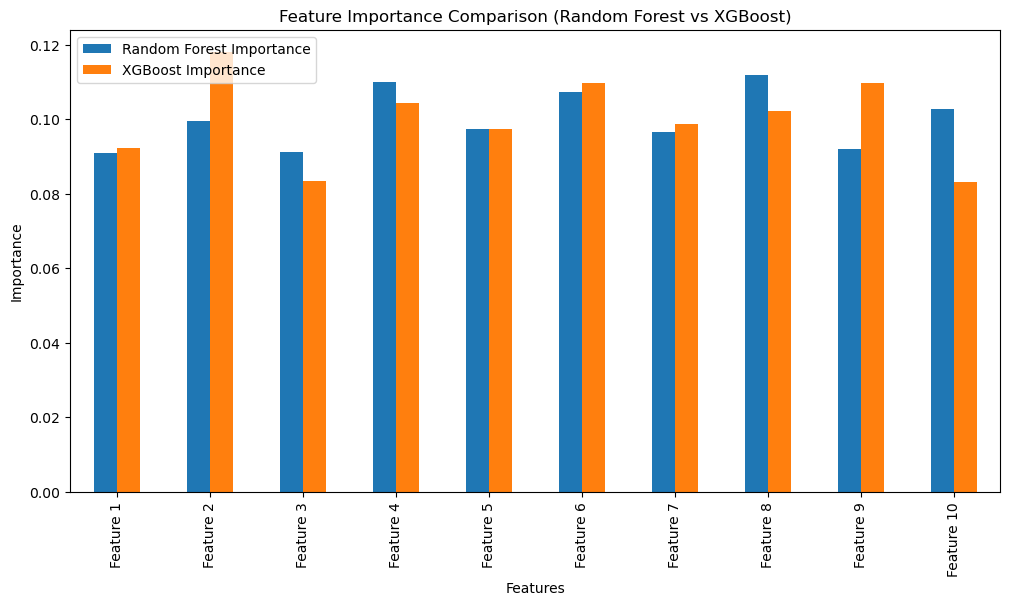

In [ ]:
# Complex Graph: Feature importance over multiple models
feature_importance_df = pd.DataFrame({
    "Feature": [f"Feature {i+1}" for i in range(n_features)],
    "Random Forest Importance": rf_model.feature_importances_,
    "XGBoost Importance": xgb_model.feature_importances_
})
feature_importance_df.set_index("Feature", inplace=True)
feature_importance_df.plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importance Comparison (Random Forest vs XGBoost)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.legend()
plt.show()